In [10]:
## Import all the dependencies

import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
## Load the dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
## Print the shape and size of the data

print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Size of X_train: {}".format(X_train.size))
print("Size of X_test: {}".format(X_test.size))

Shape of X_train: (60000, 28, 28)
Shape of X_test: (10000, 28, 28)
Size of X_train: 47040000
Size of X_test: 7840000


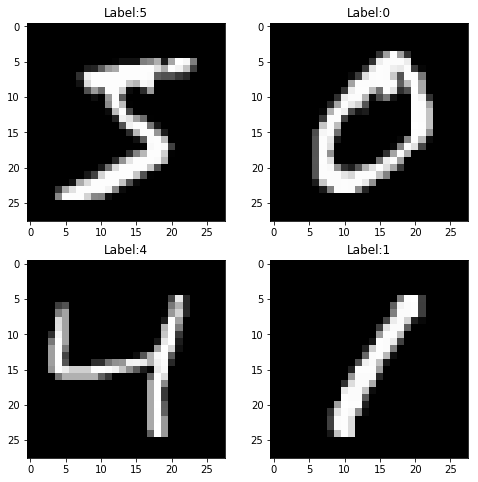

In [4]:
## Visualize a few digits

plt.figure(figsize=(8,8))
grid_param = 221
for i in range(0,4):
    plt.subplot(grid_param)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title('Label:{}'.format(y_train[i]))
    grid_param += 1

plt.show()

In [5]:
## Data Normalization

to_predict = X_test[0]
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

![](https://www.lucenaresearch.com/wp-content/uploads/2018/04/8-Digit-Recognition.png)

In [6]:
## Building an Artificial Neural Network to classify Handwitten Digits

#Intialize the model
ann = Sequential()

#Input Layer
ann.add(Dense(16, input_dim=num_pixels, activation='relu'))

#Hidden Layer
ann.add(Dense(16,  activation='relu'))

#Output Layer
ann.add(Dense(10, activation='softmax'))

#Compile and Fit
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.3574 - acc: 0.8942
Epoch 2/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.2180 - acc: 0.9360
Epoch 3/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.1873 - acc: 0.9450
Epoch 4/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.1692 - acc: 0.9502
Epoch 5/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.1572 - acc: 0.9535
Epoch 6/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.1482 - acc: 0.9558
Epoch 7/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.1411 - acc: 0.9575
Epoch 8/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.1345 - acc: 0.9596
Epoch 9/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.1298 - acc: 0.9614
Epoch 10/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.1257 

![](https://chsasank.github.io/assets/images/crash_course/mnist_net.png)

Number to Predict


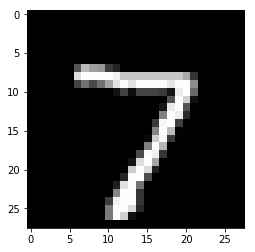

In [7]:
## Prediction
print("Number to Predict")
plt.imshow(to_predict, cmap=plt.get_cmap('gray'))

In [8]:
print("ANN Prediction:{}".format(ann.predict_classes(X_test)[0]))

ANN Prediction:7


In [9]:
## Image Credits: 
## 1. https://chsasank.github.io/assets/images/crash_course/mnist_net.png
## 2. https://www.lucenaresearch.com/wp-content/uploads/2018/04/8-Digit-Recognition.png

## Ends here